#Path integral formulation


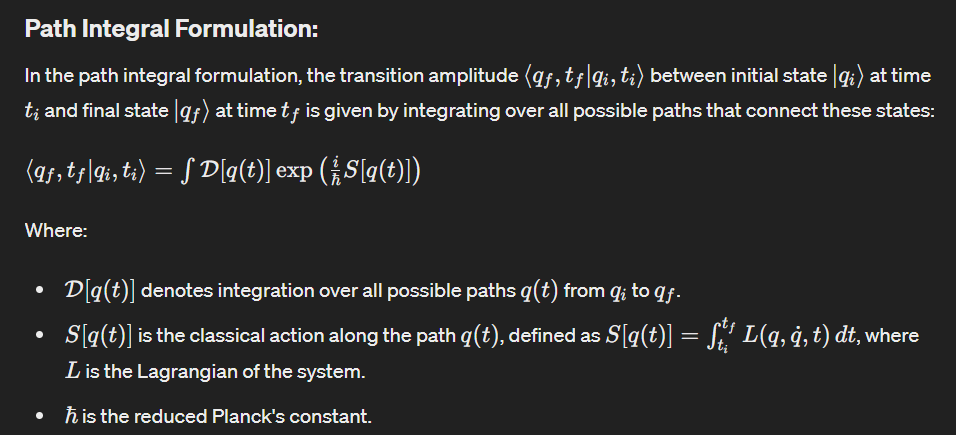

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential energy function (example: harmonic oscillator potential)
def potential(q):
    return 0.5 * q**2  # Harmonic oscillator potential

# Define the action (classical)
def action(q_path, dt):
    kinetic_energy = 0.5 * ((np.roll(q_path, -1) - q_path) / dt)**2  # Kinetic energy term
    potential_energy = potential(q_path)  # Potential energy term
    total_action = np.sum(kinetic_energy) * dt - np.sum(potential_energy) * dt
    return total_action

# Define the path integral evaluation function
def path_integral(q_i, q_f, t_i, t_f, num_steps):
    dt = (t_f - t_i) / num_steps
    paths = np.linspace(q_i, q_f, num_steps + 1)
    action_sum = action(paths, dt)
    return np.exp(1j * action_sum / hbar)

# Parameters
hbar = 1.0  # Reduced Planck's constant
q_i = -2.0  # Initial position
q_f = 2.0   # Final position
t_i = 0.0   # Initial time
t_f = 1.0   # Final time
num_steps = 1000  # Number of steps for discretization

# Evaluate the path integral
transition_amplitude = path_integral(q_i, q_f, t_i, t_f, num_steps)

# Print the transition amplitude
print("Transition Amplitude:", transition_amplitude)

Transition Amplitude: (-0.8318619829281004+0.554982559508791j)


#Coupling to electromagnetic fields, Aharanov-Bohm effect


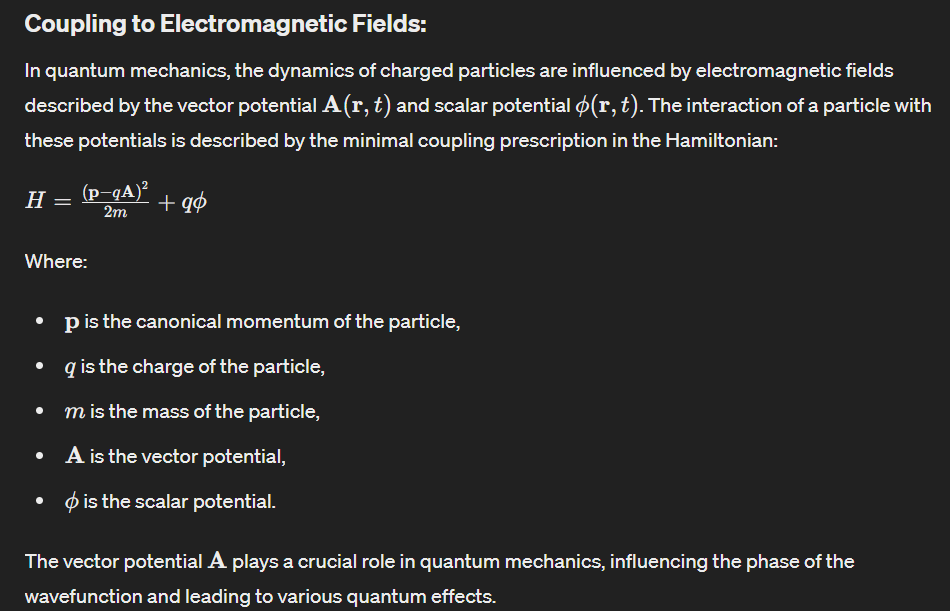

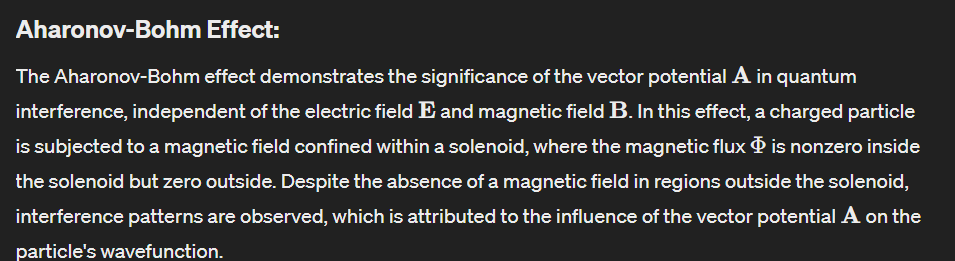

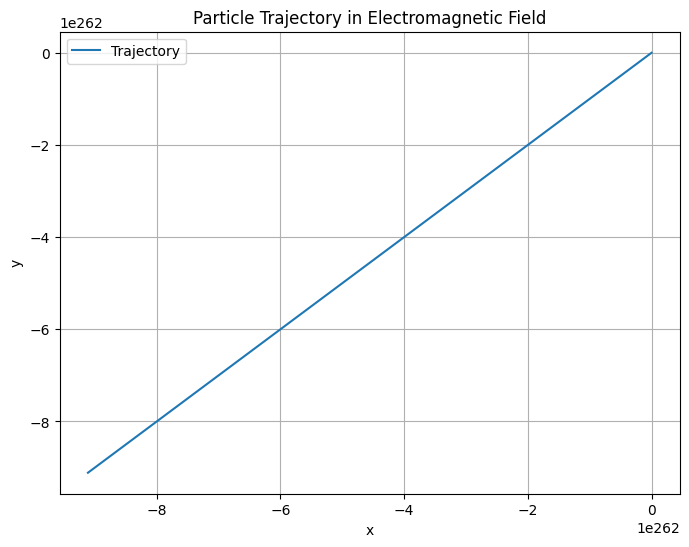

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0   # Reduced Planck's constant
q = -1.0     # Charge of the particle (electron)
m = 1.0      # Mass of the particle
def vector_potential(r, t):
    # Example: Constant vector potential (A = (0, B*t, 0))
    B = 1.0  # Magnetic field strength
    return np.array([0, B * t, 0])

def scalar_potential(r, t):
    # Example: Zero scalar potential (phi = 0)
    return 0.0
def hamiltonian(p, r, t):
    A = vector_potential(r, t)
    phi = scalar_potential(r, t)
    p -= q * A  # Minimal coupling: Modify canonical momentum with -qA
    kinetic_energy = np.dot(p, p) / (2 * m)  # Kinetic energy term
    potential_energy = q * phi  # Potential energy term
    return kinetic_energy + potential_energy
def solve_motion(r0, p0, dt, num_steps):
    # Initialize arrays to store position and momentum
    r = np.zeros((num_steps + 1, 3))
    p = np.zeros((num_steps + 1, 3))
    r[0] = r0
    p[0] = p0

    # Numerical integration (Euler method)
    for i in range(num_steps):
        t = i * dt
        r[i + 1] = r[i] + dt * p[i] / m
        p[i + 1] = p[i] - dt * (hamiltonian(p[i], r[i], t) * 2 * m)

    return r, p
# Initial conditions
r0 = np.array([0, 0, 0])   # Initial position
p0 = np.array([1, 0, 0])   # Initial momentum

# Simulation parameters
dt = 0.01     # Time step
num_steps = 1000  # Number of steps

# Solve equations of motion
positions, momenta = solve_motion(r0, p0, dt, num_steps)

# Plotting the trajectory
plt.figure(figsize=(8, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Particle Trajectory in Electromagnetic Field')
plt.legend()
plt.grid(True)
plt.show()

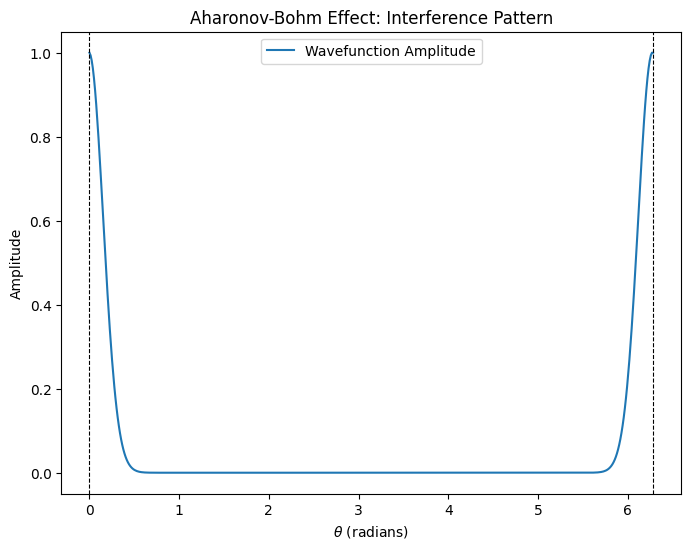

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0    # Reduced Planck's constant
q = -1.0      # Charge of the particle (electron)
B = 1.0       # Magnetic field strength
R = 1.0       # Radius of the ring
num_points = 500
theta = np.linspace(0, 2 * np.pi, num_points)

# Define the magnetic vector potential (Aharonov-Bohm setup)
A_theta = (q * B * R / (2 * hbar)) * np.exp(-1j * theta)

# Calculate the wavefunction phase
phase = np.cumsum(A_theta)
wavefunction = np.exp(1j * phase)

# Plotting the interference pattern
plt.figure(figsize=(8, 6))
plt.plot(theta, np.abs(wavefunction), label='Wavefunction Amplitude')
plt.xlabel(r'$\theta$ (radians)')
plt.ylabel('Amplitude')
plt.title('Aharonov-Bohm Effect: Interference Pattern')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Indicate solenoid position
plt.axvline(2*np.pi, color='black', linestyle='--', linewidth=0.8)  # Indicate solenoid position
plt.legend()
plt.show()
